In [1]:
%load_ext autoreload
%autoreload 2

Excitatory Input

The impulse response (IR) of the first input is defined as:

λ1(t)=Asin⁡(ωst)+Bsin⁡(ωnt)+C

Second Input:

λ2(t)=Dsin⁡(ωnt)+EλI​(t)=Dsin(ωn​t)+E

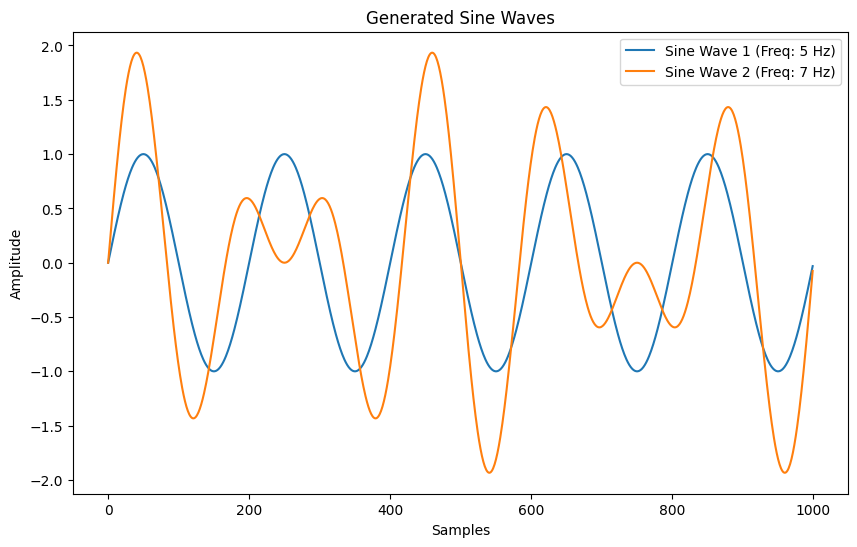

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cd_network import ei, ee, cd, simple_ee


def generate_sine_wave(freq, duration, fs):
    """
    Generates a sine wave of a given frequency and duration.
    
    Parameters:
        freq (float): Frequency of the sine wave.
        duration (float): Duration of the sine wave in seconds.
        fs (float): Sampling frequency in Hz.
    
    Returns:
        np.ndarray: Generated sine wave.
    """
    t = np.arange(0, duration, 1/fs)
    sine_wave = np.sin(2 * np.pi * freq * t)
    return sine_wave

# Parameters
fs = 1000  # Sampling frequency
duration = 1.0  # Duration in seconds
freq1 = 5  # Frequency of the first sine wave
freq2 = 7  # Frequency of the second sine wave

# Generate sine waves
sine_wave1 = generate_sine_wave(freq1, duration, fs)
sine_wave2 = generate_sine_wave(freq2, duration, fs)
sine_wave2 += sine_wave1

# Define delta_s for the time window
delta_s = 0.01  # Example value, can be adjusted

# Plot the sine waves
plt.figure(figsize=(10, 6))
plt.plot(sine_wave1, label=f'Sine Wave 1 (Freq: {freq1} Hz)')
plt.plot(sine_wave2, label=f'Sine Wave 2 (Freq: {freq2} Hz)')
plt.title('Generated Sine Waves')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


EI Cells: Remove Common Elements

By comparing the excitatory and inhibitory inputs, EI cells effectively cancel out shared elements, which often include undesired noise components.

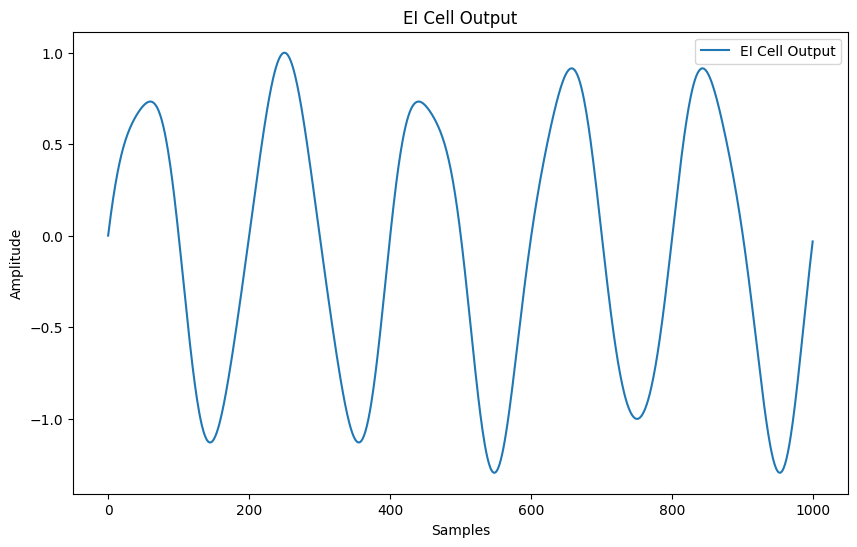

In [3]:
# Test EI cell
ei_output = ei(sine_wave1, sine_wave2, delta_s, fs)
plt.figure(figsize=(10, 6))
plt.plot(ei_output, label='EI Cell Output')
plt.title('EI Cell Output')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

EE Cells: Increase Common Elements

EE cells amplify components that are common across multiple input signals.

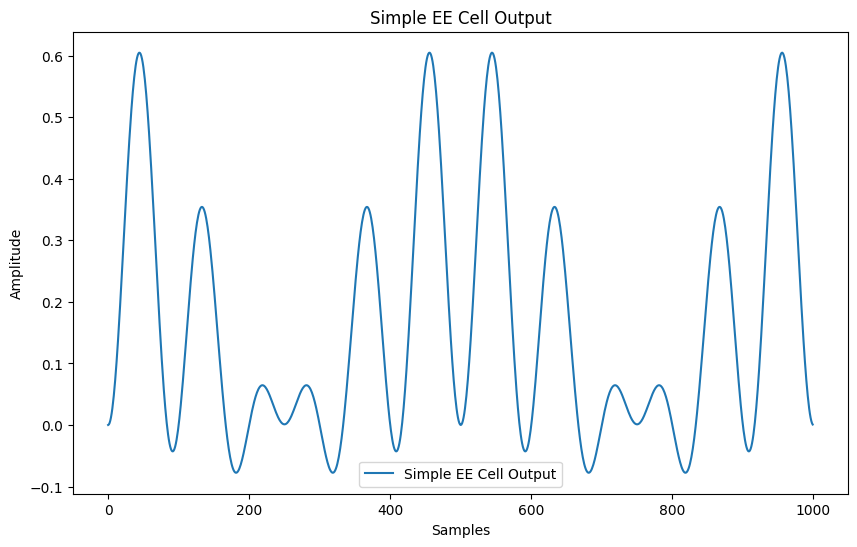

In [4]:
# Test Simple EE cell
simple_ee_output = simple_ee(np.vstack([sine_wave1, sine_wave2]), delta_s, fs)
plt.figure(figsize=(10, 6))
plt.plot(simple_ee_output, label='Simple EE Cell Output')
plt.title('Simple EE Cell Output')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()